In [1]:
# Import key libraries for data prep and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D
import io
import sys, os, glob

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CLEANED_synthetic_ecommerce_2025-06-13_Version2.csv to CLEANED_synthetic_ecommerce_2025-06-13_Version2.csv


In [2]:
# Load directly from file path
df = pd.read_csv('CLEANED_synthetic_ecommerce_2025-06-13_Version2.csv')

# Show preview
df.head()

,customer_id,signup_date,last_activity_ts,recency_days,total_spend_12m,avg_basket_value,sessions_90d,days_since_last_purchase,items_per_order,loyalty_points,...,is_premium_member,marketing_opt_in,preferred_device,country_code,customer_segment,primary_browser,next_product_cat,clv_3yr_usd,date_pulled,bool_ATBO
0,1,2023-01-27,2025-04-16 01:58:26.529018164,57,4174.02,30.83,22,18,3,489.0,...,No,No,SmartTV,GB,Segment_9,Browser_13,Apparel,4948.64,2025-06-13,False
1,2,2020-01-08,2020-10-29 06:21:54.215300560,1687,7185.10,42.50,0,1,5,485.0,...,No,Yes,Other,DE,Segment_10,Browser_17,Home_Garden,7867.41,2025-06-13,True
2,3,2023-03-22,2024-05-18 17:34:30.651219606,390,11067.80,61.66,0,42,6,506.0,...,Yes,Yes,Desktop,IT,Segment_10,Browser_1,Sports,13294.63,2025-06-13,True
3,4,2021-09-18,2024-01-29 17:50:06.211375475,500,659.84,39.83,0,57,3,441.0,...,No,Yes,Tablet,NO,Segment_20,Browser_15,Sports,800.40,2025-06-13,True
4,5,2021-12-23,2023-02-10 13:14:47.794090986,853,4831.90,49.10,0,19,2,463.0,...,No,Yes,Desktop,IE,Segment_20,Browser_1,Apparel,5704.24,2025-06-13,True


In [3]:
# Convert 'signup_date' and 'last_activity_ts' to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['last_activity_ts'] = pd.to_datetime(df['last_activity_ts'], errors='coerce')

In [4]:
# Create Classification summary table
df_types = df.dtypes.reset_index()
df_types.columns = ['Feature Label', 'Data Type']

df_types['Data Type'] = df_types['Data Type'].astype(str)

# Define logic for classifying variables
def classify_variable(dtype_str):
    if 'int' in dtype_str or 'float' in dtype_str:
        return 'Numeric'
    elif 'datetime' in dtype_str:
        return 'Datetime'
    else:
        return 'Categorical'

#Apply classification
df_types['Classification'] = df_types['Data Type'].apply(classify_variable)

#Show final table
df_types = df_types[['Feature Label', 'Data Type', 'Classification']]
df_types

,Feature Label,Data Type,Classification
0,customer_id,int64,Numeric
1,signup_date,datetime64[ns],Datetime
2,last_activity_ts,datetime64[ns],Datetime
3,recency_days,int64,Numeric
4,total_spend_12m,float64,Numeric
5,avg_basket_value,float64,Numeric
6,sessions_90d,int64,Numeric
7,days_since_last_purchase,int64,Numeric
8,items_per_order,int64,Numeric
9,loyalty_points,float64,Numeric


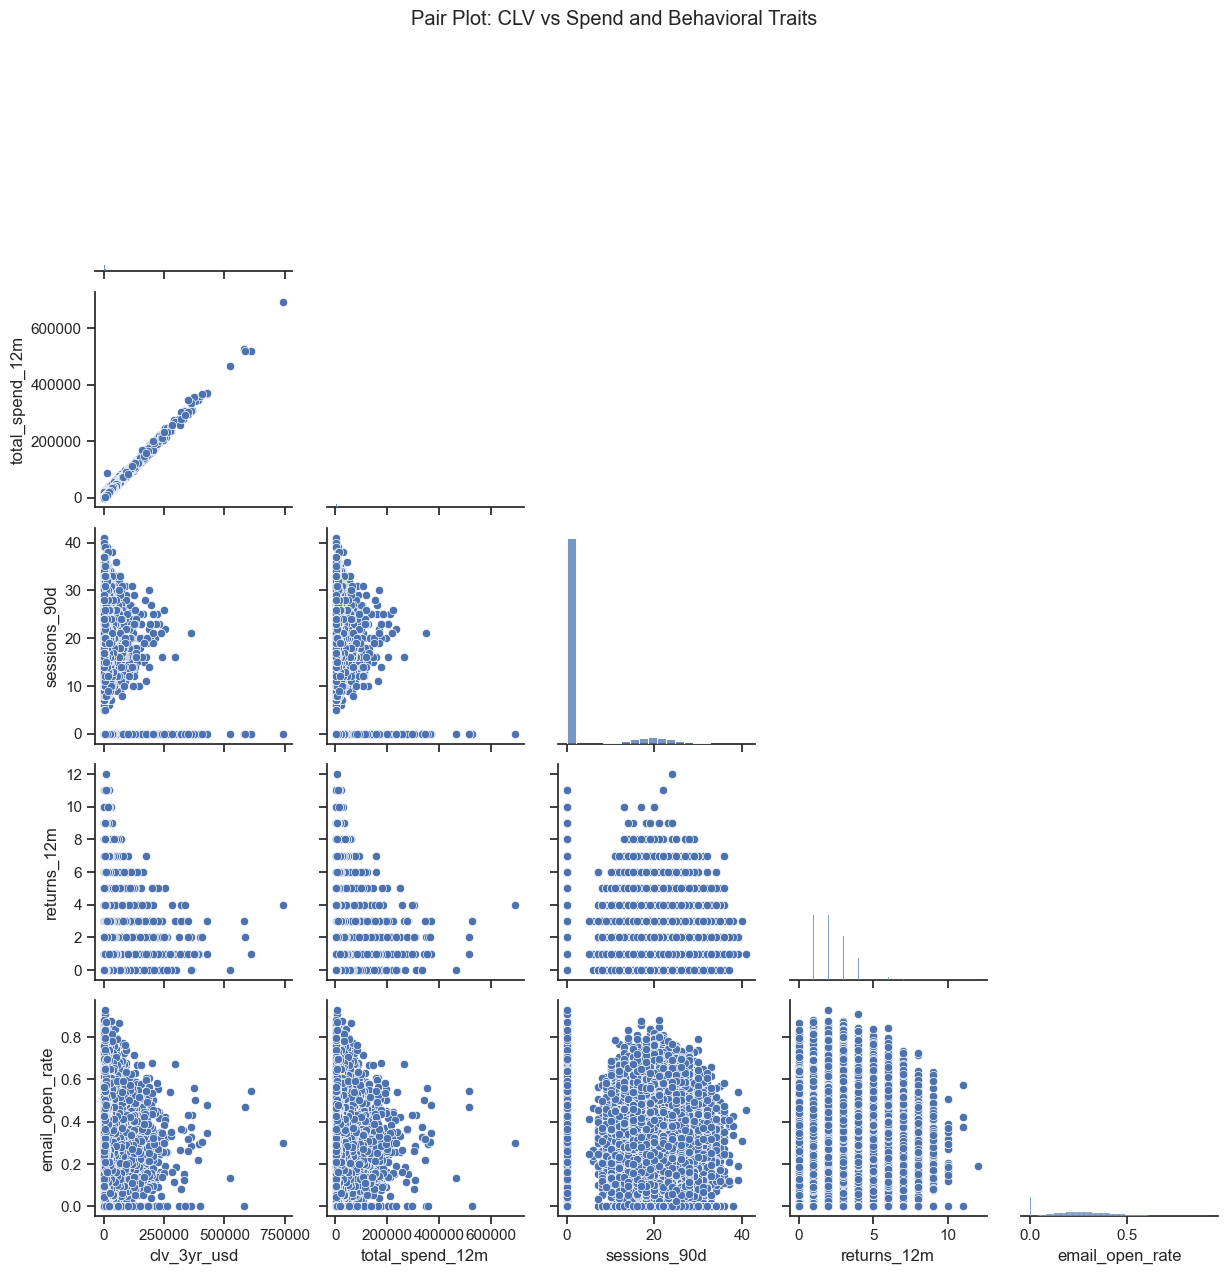

In [5]:
# Make sure our key columns are numeric (just in case)
cols = ['clv_3yr_usd', 'total_spend_12m', 'sessions_90d', 'returns_12m', 'email_open_rate']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows that have any missing values in those key columns
pairplot_data = df[cols].dropna()

# Set Seaborn style so everything looks clean
sns.set(style="ticks", color_codes=True)

# Build the pair plot showing all bivariate relationships
pairplot = sns.pairplot(pairplot_data, diag_kind='hist', corner=True)

# Add a title to the full plot
pairplot.fig.suptitle('Pair Plot: CLV vs Spend and Behavioral Traits', y=1.02)

# Show the plot
plt.show()

<Axes: xlabel='spend_tier', ylabel='clv_3yr_usd'>

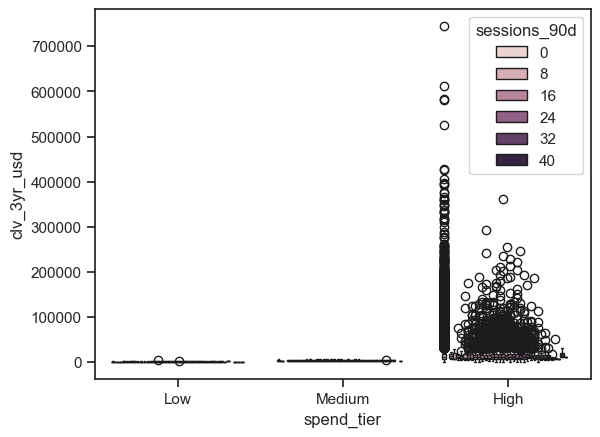

In [15]:
# CLV by Spend tier and Sessions
df['spend_tier'] = pd.qcut(df['total_spend_12m'], q=3, labels=['Low', 'Medium', 'High'])
sns.boxplot(x='spend_tier', y='clv_3yr_usd', hue='sessions_90d', data=df)
# plt.yscale('log')


In [11]:
df['sessions_90d'].describe()

count    300000.000000
mean          2.937477
std           7.279116
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          41.000000
Name: sessions_90d, dtype: float64

<Axes: xlabel='spend_tier', ylabel='clv_3yr_usd'>

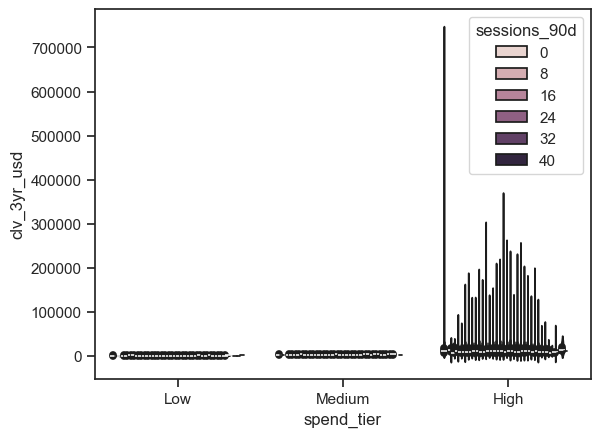

In [14]:
# CLV by Spend tier and Sessions
df['spend_tier'] = pd.qcut(df['total_spend_12m'], q=3, labels=['Low', 'Medium', 'High'])
sns.violinplot(x='spend_tier', y='clv_3yr_usd', hue='sessions_90d', data=df)
# plt.yscale('log')


<Axes: xlabel='spend_tier', ylabel='sessions_90d'>

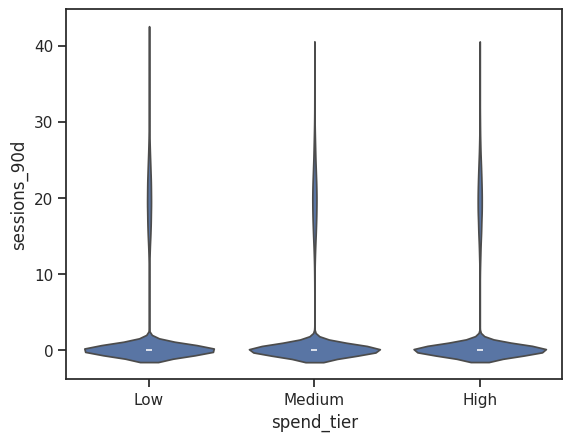

In [26]:
# Violin plot Sessions vs CLV
sns.violinplot(x='spend_tier', y='sessions_90d', data=df)

<Axes: >

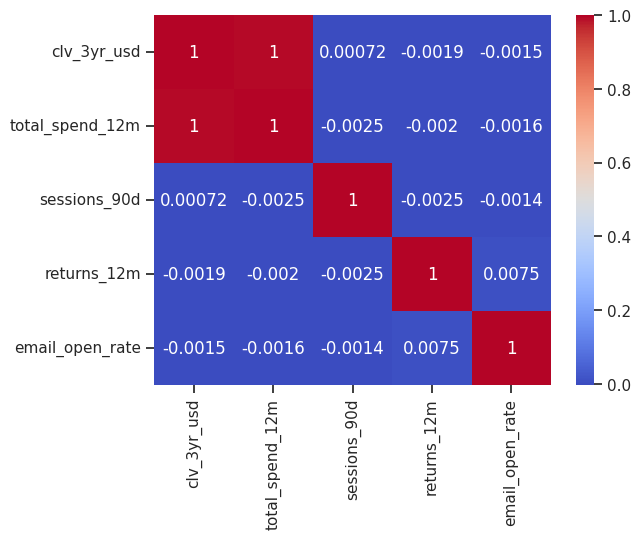

In [27]:
#Heatmap of corrleation matrix for key varibales
corr = df[['clv_3yr_usd', 'total_spend_12m', 'sessions_90d', 'returns_12m', 'email_open_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')